In [ ]:
import os
#import needed libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

from tensorflow import keras
from keras.models import load_model,Sequential
from keras.preprocessing.image import ImageDataGenerator as Imgen
from keras.preprocessing import image
from keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout

#from tensorflow.python.keras.applications.resnet import ResNet50
#from tensorflow.python.keras.applications.resnet_v2 import ResNet152V2
from PIL import Image
from sklearn.metrics import classification_report,confusion_matrix

import os

In [ ]:
#New Method
#pip install split-folders --upgrade --quiet
!pip install split-folders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

In [ ]:
folder = "/content/drive/MyDrive/a2/a2/chest_xray/chest_xray/test/"

In [ ]:
import splitfolders
splitfolders.ratio(folder,output="Tr-Te-Val",ratio=(0.9,0.05,0.05))

Copying files: 624 files [00:06, 97.42 files/s] 


In [ ]:
train_dir = 'Tr-Te-Val/train'
test_dir = 'Tr-Te-Val/test'
val_dir = 'Tr-Te-Val/val'

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
#from tensorflow.keras.preprocessing.image import  ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255,
                                   zoom_range=0.2,
                                   shear_range = 0.2,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   vertical_flip=False,
                                   fill_mode = 'nearest')
val_datagen = ImageDataGenerator(rescale=1./255,
                                 zoom_range = 0.2,
                                 shear_range=0.2,
                                 vertical_flip=False,
                                 width_shift_range=0.2,
                                 height_shift_range=0.2,
                                 fill_mode='nearest')
test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size = (180,180),
                                                    batch_size=32,
                                                    seed = 123)

Found 1087 images belonging to 2 classes.


In [ ]:
valid_generator = val_datagen.flow_from_directory(val_dir,
                                                  target_size = (180,180),
                                                  batch_size = 32,
                                                  seed = 123)

Found 58 images belonging to 2 classes.


In [ ]:
test_generator = test_datagen.flow_from_directory(test_dir,
                                                  target_size =(180,180),
                                                  batch_size = 32,
                                                  seed = 123,
                                                  shuffle = False)

Found 64 images belonging to 2 classes.


In [ ]:
#extracclasses in training
import os
classess_train = []
for i in os.listdir(train_dir):
  classess_train.append(i)

In [ ]:
classess_train

['NORMAL', 'PNEUMONIA']

In [ ]:
#testing
import os
classess_test = []
for i in os.listdir(test_dir):
  classess_test.append(i)

In [ ]:
classess_test

['NORMAL', 'PNEUMONIA']

In [ ]:
#validation
import os
classess_valid = []
for i in os.listdir(val_dir):
  classess_valid.append(i)

In [ ]:
classess_valid

['NORMAL', 'PNEUMONIA']

In [ ]:
train_data,train_label = next(train_generator)

In [ ]:
valid_data,valid_label = next(valid_generator)

In [ ]:
test_data,test_label = next(test_generator)

In [ ]:
#training label
#plot function
def plot_images(img,labels):
    plt.figure(figsize=(15,10))
    for i in range(10):
        plt.subplot(4,4,i+1)
        plt.imshow(img[i])
        plt.title(classess_train[np.argmax(labels[i])])
        plt.axis('off')

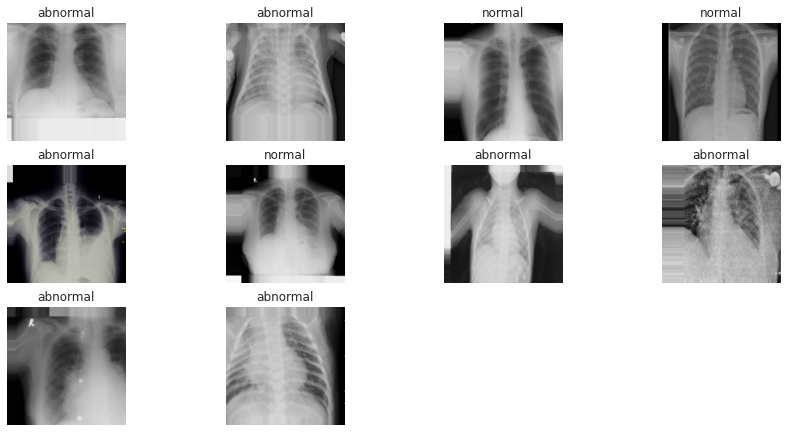

In [ ]:
plot_images(train_data,train_label)

In [ ]:
#testing label
#plot function
def plot_images_test(img,labels):
    plt.figure(figsize=(15,10))
    for i in range(16):
        plt.subplot(4,4,i+1)
        plt.imshow(img[i])
        plt.title(classess_test[np.argmax(labels[i])])
        plt.axis('off')

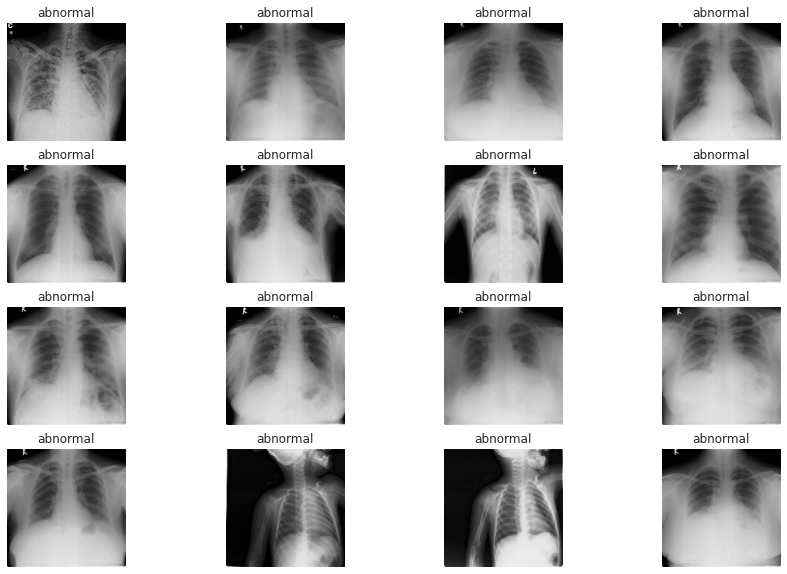

In [ ]:
plot_images_test(test_data,test_label)

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt

import os
from distutils.dir_util import copy_tree, remove_tree

from PIL import Image
from random import randint

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import matthews_corrcoef as MCC
from sklearn.metrics import balanced_accuracy_score as BAS
from sklearn.metrics import classification_report, confusion_matrix

import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt

import os
from distutils.dir_util import copy_tree, remove_tree

from PIL import Image
from random import randint

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import matthews_corrcoef as MCC
from sklearn.metrics import balanced_accuracy_score as BAS
from sklearn.metrics import classification_report, confusion_matrix

import tensorflow as tf
from keras.utils.vis_utils import plot_model
from tensorflow.keras import Sequential, Input
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import Conv2D, Flatten
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.preprocessing.image import ImageDataGenerator as IDG
from tensorflow.keras.layers import SeparableConv2D, BatchNormalization, GlobalAveragePooling2D
import pandas as pd
import matplotlib.pyplot as plt
import skimage.io
import os
import tqdm
import glob
import tensorflow

from tqdm import tqdm
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

from skimage.io import imread, imshow
from skimage.transform import resize
from skimage.color import grey2rgb

#from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, BatchNormalization, Dropout, Flatten, Dense, Activation, MaxPool2D, Conv2D
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.applications.densenet import DenseNet169
from tensorflow.keras.preprocessing.image import load_img, img_to_array



In [ ]:
InceptionV3_model = tf.keras.applications.InceptionV3(weights='imagenet', include_top=False, input_shape=(224, 224, 3))


87924736/87910968 [==============================] - 0s 0us/step


In [ ]:
from tensorflow.keras import Model
from tensorflow.keras.layers import Conv2D, Dense, MaxPooling2D, Dropout, Flatten,GlobalAveragePooling2D
from tensorflow.keras.models import Sequential

# The last 15 layers fine tune
for layer in InceptionV3_model.layers[:-15]:
    layer.trainable = False

x = InceptionV3_model.output
x = GlobalAveragePooling2D()(x)
x = Flatten()(x)
x = Dense(units=512, activation='relu')(x)
x = Dropout(0.3)(x)
x = Dense(units=512, activation='relu')(x)

x = Dense(units=512, activation='relu')(x)
x = Dense(units=512, activation='relu')(x)
x = Dense(units=512, activation='relu')(x)
x = Dense(units=512, activation='relu')(x)
x = Dense(units=512, activation='relu')(x)


x = Dropout(0.3)(x)
output  = Dense(units=2, activation='sigmoid')(x)
model = Model(InceptionV3_model.input, output)

In [ ]:
base_model = DenseNet169(input_shape=(180,180,3),
                         include_top = False,weights = "imagenet")

51888128/51877672 [==============================] - 0s 0us/step


In [ ]:
for layer in base_model.layers:
  layer.trainable = False

In [ ]:
model=Sequential()
model.add(base_model)
model.add(Dropout(0.5))
model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(512,kernel_initializer='he_uniform'))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(2,activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet169 (Functional)    (None, 5, 5, 1664)        12642880  
                                                                 
 dropout (Dropout)           (None, 5, 5, 1664)        0         
                                                                 
 flatten (Flatten)           (None, 41600)             0         
                                                                 
 batch_normalization (BatchN  (None, 41600)            166400    
 ormalization)                                                   
                                                                 
 dense (Dense)               (None, 512)               21299712  
                                                                 
 activation (Activation)     (None, 512)               0         
                                                        

In [ ]:
from tensorflow.keras.optimizers import RMSprop, Adam
model.compile(loss='categorical_crossentropy',optimizer=Adam(learning_rate=0.001),
              metrics=['accuracy'])

In [ ]:
callbacks4 = [
    EarlyStopping(monitor = 'loss', patience = 7),
    ReduceLROnPlateau(monitor = 'loss', patience = 4),
    ModelCheckpoint('/content/drive/MyDrive/model.best4.hdf5', monitor='loss' , save_best_only=True) # saving the best model
]

In [ ]:
history = model.fit(train_generator,validation_data=valid_generator,callbacks = callbacks4,epochs=30)

Epoch 1/30
34/34 [==============================] - 51s 920ms/step - loss: 1.1873 - accuracy: 0.8408 - val_loss: 3.5798 - val_accuracy: 0.7586 - lr: 0.0010
Epoch 2/30
34/34 [==============================] - 27s 810ms/step - loss: 0.7295 - accuracy: 0.8850 - val_loss: 1.7342 - val_accuracy: 0.8793 - lr: 0.0010
Epoch 3/30
34/34 [==============================] - 26s 776ms/step - loss: 0.6587 - accuracy: 0.8905 - val_loss: 0.2300 - val_accuracy: 0.9310 - lr: 0.0010
Epoch 4/30
34/34 [==============================] - 27s 793ms/step - loss: 0.4413 - accuracy: 0.8970 - val_loss: 0.0961 - val_accuracy: 0.9655 - lr: 0.0010
Epoch 5/30
34/34 [==============================] - 27s 789ms/step - loss: 0.3348 - accuracy: 0.8979 - val_loss: 0.2341 - val_accuracy: 0.9310 - lr: 0.0010
Epoch 6/30
34/34 [==============================] - 26s 769ms/step - loss: 0.2154 - accuracy: 0.9209 - val_loss: 0.2399 - val_accuracy: 0.9138 - lr: 0.0010
Epoch 7/30
34/34 [==============================] - 24s 717ms/st

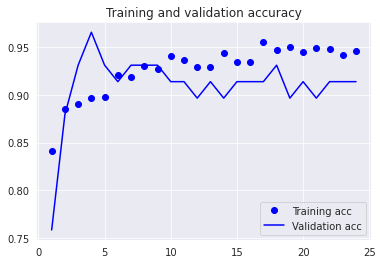

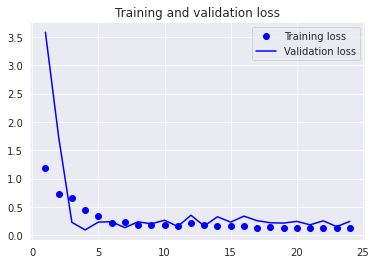

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:
test_scores = model.evaluate(test_generator)

2/2 [==============================] - 1s 301ms/step - loss: 0.2741 - accuracy: 0.9219


In [ ]:
print("Testing Accuracy: %.2f%%"%(test_scores[1] * 100))

Testing Accuracy: 92.19%


<Figure size 432x288 with 0 Axes>

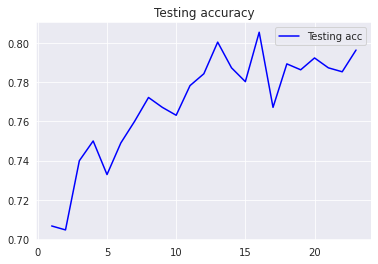

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'b', label='Testing acc')
plt.title('Testing accuracy')
plt.legend()
plt.figure()

In [ ]:
preds = model.predict(test_generator,verbose=1)

2/2 [==============================] - 2s 30ms/step


In [ ]:
pred = [np.argmax(i) for i in preds]
pred[:5]

[0, 0, 0, 0, 0]

In [ ]:
actual = test_generator.classes

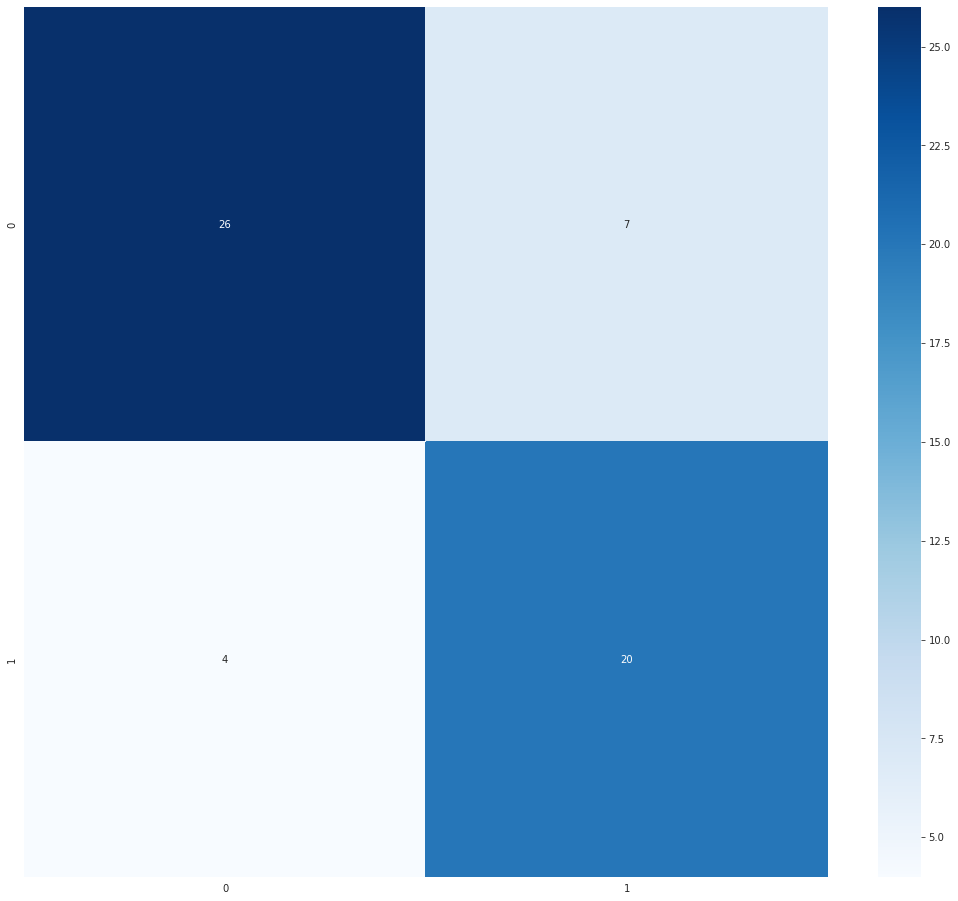

In [ ]:
plt.figure(figsize=(18,16))
sns.heatmap(confusion_matrix(pred,actual),annot = True, fmt = 'd', cmap = 'Blues');

In [ ]:
#@title Default title text
print(classification_report(pred,actual))

              precision    recall  f1-score   support

           0       0.87      0.79      0.83        33
           1       0.74      0.83      0.78        24

    accuracy                           0.81        57
   macro avg       0.80      0.81      0.80        57
weighted avg       0.81      0.81      0.81        57



In [ ]:
model.save('/content/drive/MyDrive/trainedModel')


INFO:tensorflow:Assets written to: /content/drive/MyDrive/trainedModel/assets


In [ ]:
new_model = load_model("/content/drive/MyDrive/trainedModel")

In [ ]:
from numpy import argmax
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import load_model

# load and prepare the image
def load_image(filename):
  # load the image
  img = load_img(filename, grayscale=True, target_size=(180, 180))
  # convert to array
  img = img_to_array(img)
  # reshape into a single sample with 1 channel
  img = img.reshape(-1, 180, 180, 1)
  # prepare pixel data
  img = img.astype('float32')
  img = img / 255.0
  return img

new_model.layers[0].input_shape

img = load_image('/content/drive/MyDrive/Data/test/COVID19/COVID19(461).jpg')
predict_value = new_model.predict(img)

if predict_value[0][0] >= 0.5:
  prediction = 'normal'
else:
  prediction = 'disease'
print(prediction)

/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


ValueError: ignored